In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

# import dataloader & stock data downloader
import FinanceDataReader as fdr

In [3]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [4]:
import FinanceDataReader as fdr

df_nasdaq = fdr.DataReader('NASDAQCOM', data_source='fred')
df_nasdaq

,NASDAQCOM
DATE,
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2022-06-16,10646.10
2022-06-17,10798.35
2022-06-20,10798.35


<AxesSubplot:xlabel='DATE'>

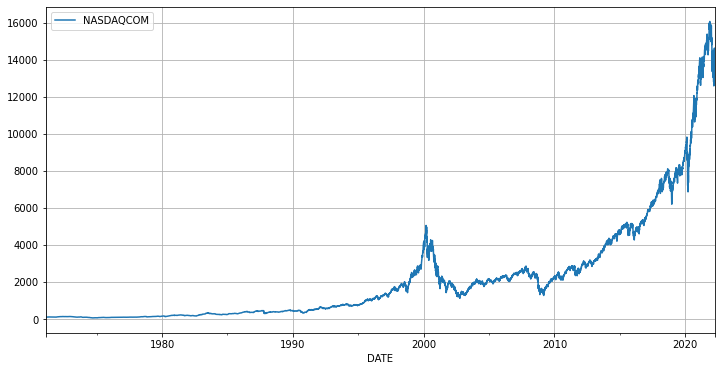

In [8]:
df_nasdaq.plot()

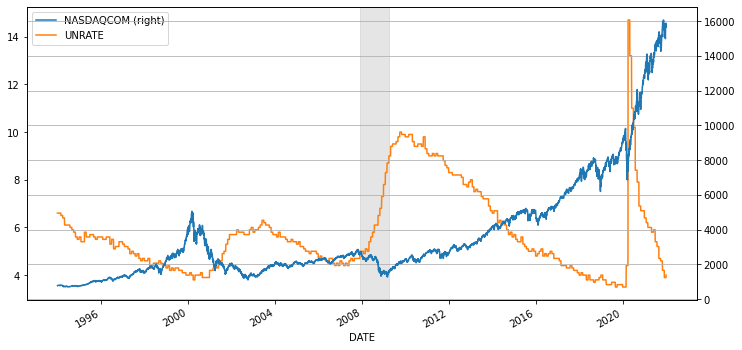

In [9]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='1994', end='2022', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

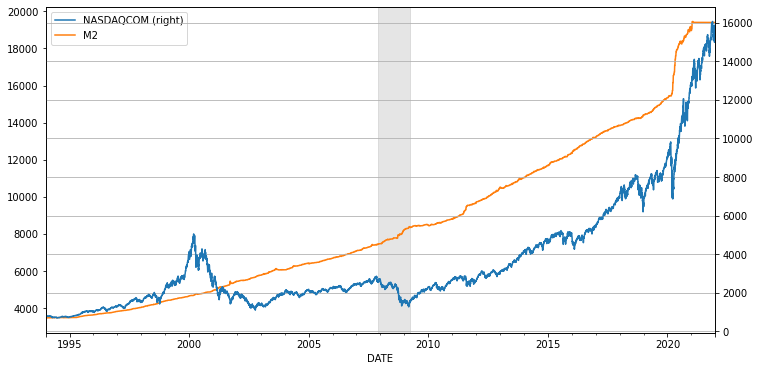

In [10]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 M2통화량(M2) 

df = fdr.DataReader(['NASDAQCOM', 'M2'], start='1994', end='2022', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

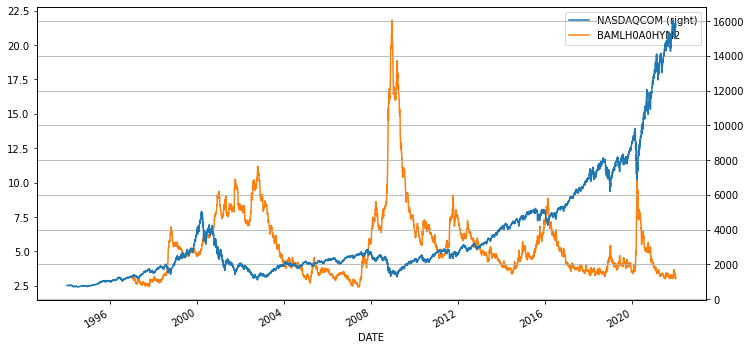

In [11]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드 

df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='1994', end='2022', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

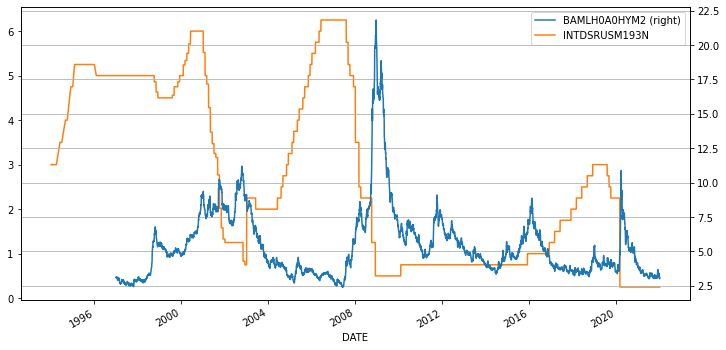

In [12]:
import FinanceDataReader as fdr

## 6. 하이일드 채권 스프레드 (BAMLH0A0HYM2)
# https://fred.stlouisfed.org/series/BAMLH0A0HYM2

# 하이일드 채권은 낮은 신용등급 회사에 투자하는 고위험,고수익 채권입니다. 여기서 스프레드는 국채 수익률과의 차이를 이야기합니다. 
# 하이일드 채권 스프레드 = 하이일드 채권 수익률 – 국채 수익률
# 불황일 수록 하이일드 채권 스프레드는 더 커집니다.
# FRED에서 'ICE BofA US High Yield Index Option-Adjusted Spread'라는 하이일드 채권 스프레드 데이터를 제공합니다.

# https://fred.stlouisfed.org/series/INTDSRUSM193N
df = fdr.DataReader(['BAMLH0A0HYM2', 'INTDSRUSM193N'], start='1994', end='2022', data_source='fred')
ax = df.plot(secondary_y='BAMLH0A0HYM2')

In [13]:
df = fdr.DataReader(['INTDSRUSM193N'], start='1994', end='2022', data_source='fred')
df.head()

,INTDSRUSM193N
DATE,
1994-01-01,3.00
1994-02-01,3.00
1994-03-01,3.00
1994-04-01,3.00
1994-05-01,3.24


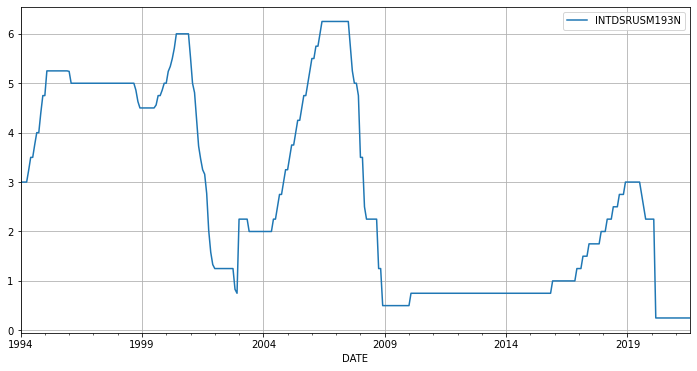

In [14]:
ax = df.plot()

In [28]:
import pandas as pd
import numpy as np

def get_fred_data(symbol, start_query, end_query):
    """Getting derivatives/option price and macroeconomic data from the FRED"""
    # validate start_query and end query
    if "-" not in start_query or "-" not in end_query:
      raise ValueError("start_query and end_query must be in the format YYYY-MM-DD")

    # create dataframe from FRED website using pandas' methods
    url = f'https://fred.stlouisfed.org/graph/fredgraph.csv?id={symbol}&cosd={start_query}&coed={end_query}'
    df = pd.read_csv(url, parse_dates=['DATE'], na_values='.')
    df = df.set_index('DATE') # set datetime index for "DATE" column
    df = df.fillna(method='ffill') # forward fill
    return df

df_fomc = get_fred_data('INTDSRUSM193N', '1970-01-01', '2022-04-26')

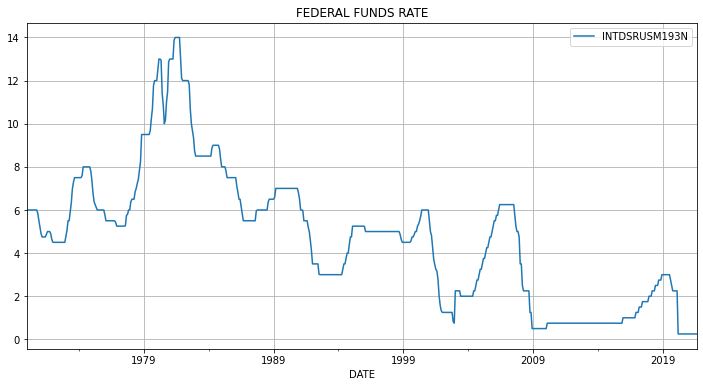

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

ax = df_fomc.plot(title="FEDERAL FUNDS RATE")

### Using Elastic Net - Regression

In [1]:
import FinanceDataReader as fdr

df = fdr.DataReader(
  [
    'NASDAQCOM', 
    'INTDSRUSM193N', 
    'UNRATE', 
    'ICSA', 
    'UMCSENT', 
    'HSN1F', 
    'M1'
    'BAMLH0A0HYM2',
  ], start='1970-01-01', end='2022-04-26', data_source='fred')
# bfill 
df = df.fillna(method='bfill')

In [2]:
for column in df.columns:
    column_name = f"{column}_rolling_1m"
    df[column_name] = df[column].rolling(window=30).mean()

df.tail()

,NASDAQCOM,INTDSRUSM193N,UNRATE,UMCSENT,HSN1F,ICSA,NASDAQCOM_rolling_1m,INTDSRUSM193N_rolling_1m,UNRATE_rolling_1m,UMCSENT_rolling_1m,HSN1F_rolling_1m,ICSA_rolling_1m
DATE,,,,,,,,,,,,
2022-04-18,13332.36,0.25,3.6,62.8,772.0,184000.0,13870.194667,0.25,3.6,62.8,772.0,174066.666667
2022-04-19,13619.66,0.25,3.6,62.8,772.0,184000.0,13892.562667,0.25,3.6,62.8,772.0,174300.000000
2022-04-20,13453.07,0.25,3.6,62.8,772.0,184000.0,13893.113333,0.25,3.6,62.8,772.0,174533.333333
2022-04-21,13174.65,0.25,3.6,62.8,772.0,184000.0,13878.442333,0.25,3.6,62.8,772.0,174766.666667
2022-04-22,12839.29,0.25,3.6,62.8,772.0,184000.0,13843.290667,0.25,3.6,62.8,772.0,175000.000000


In [3]:
# get monthly data with highest value in the month
df_monthly = df.resample('M').max()
df_monthly.head()

,NASDAQCOM,INTDSRUSM193N,UNRATE,UMCSENT,HSN1F,ICSA,NASDAQCOM_rolling_1m,INTDSRUSM193N_rolling_1m,UNRATE_rolling_1m,UMCSENT_rolling_1m,HSN1F_rolling_1m,ICSA_rolling_1m
DATE,,,,,,,,,,,,
1970-01-31,100.0,6.0,3.9,78.1,461.0,268000.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-28,100.0,6.0,4.2,78.1,373.0,271000.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-31,100.0,6.0,4.4,78.1,389.0,276000.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-30,100.0,6.0,4.6,78.1,445.0,374000.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-31,100.0,6.0,4.8,75.4,466.0,349000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_monthly.tail()

,NASDAQCOM,INTDSRUSM193N,UNRATE,UMCSENT,HSN1F,ICSA,NASDAQCOM_rolling_1m,INTDSRUSM193N_rolling_1m,UNRATE_rolling_1m,UMCSENT_rolling_1m,HSN1F_rolling_1m,ICSA_rolling_1m
DATE,,,,,,,,,,,,
2021-12-31,15871.26,0.25,3.9,70.6,860.0,240000.0,15767.980667,0.25,4.230000,70.280000,849.300000,265200.0
2022-01-31,15832.80,0.25,4.0,67.2,788.0,240000.0,15491.016000,0.25,3.986667,70.273333,852.800000,227200.0
2022-02-28,14490.37,0.25,3.8,62.8,772.0,214000.0,14667.805333,0.25,3.983333,67.393333,794.666667,227600.0
2022-03-31,14619.64,0.25,3.6,62.8,772.0,198000.0,13845.306333,0.25,3.826667,63.533333,774.666667,202800.0
2022-04-30,14532.55,0.25,3.6,62.8,772.0,186000.0,13893.113333,0.25,3.613333,62.800000,772.000000,178800.0


In [5]:
df_monthly.bfill(inplace=True)
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628 entries, 1970-01-31 to 2022-04-30
Freq: M
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NASDAQCOM                 628 non-null    float64
 1   INTDSRUSM193N             628 non-null    float64
 2   UNRATE                    628 non-null    float64
 3   UMCSENT                   628 non-null    float64
 4   HSN1F                     628 non-null    float64
 5   ICSA                      628 non-null    float64
 6   NASDAQCOM_rolling_1m      628 non-null    float64
 7   INTDSRUSM193N_rolling_1m  628 non-null    float64
 8   UNRATE_rolling_1m         628 non-null    float64
 9   UMCSENT_rolling_1m        628 non-null    float64
 10  HSN1F_rolling_1m          628 non-null    float64
 11  ICSA_rolling_1m           628 non-null    float64
dtypes: float64(12)
memory usage: 63.8 KB


In [99]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ElasticNetCV

scaler = StandardScaler()
# model = LinearRegression()
# model = ElasticNet()
# model = ElasticNetCV()
# model = Ridge(alpha=0.5, normalize=True)
model = Lasso(alpha=0.3, normalize=False)

# set INTDSRUSM193N as target
X = df_monthly.drop(['INTDSRUSM193N'], axis=1)
y = df_monthly['INTDSRUSM193N']

# display(X.tail())

# scale data
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

# display(X)

# train model
model.fit(X, y)

# predict next 6 steps with the model
prediction = model.predict(X[-1:])
prediction = scaler.inverse_transform(prediction)
print(prediction)

[1.56890936]


In [108]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

alpha_space = [1,2,3,4,5]
param_grid = {'alpha': alpha_space}
model = Lasso(normalize=False, max_iter=100000)
gm_cv = GridSearchCV(model, param_grid, cv=5)
gm_cv.fit(X, y)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1, 2, 3, 4, 5]})

In [100]:
from sklearn.metrics import mean_squared_error

# get r2 and mse score
r2_score = model.score(X, y)
mse_score = mean_squared_error(y, model.predict(X))
rmse_score = np.sqrt(mse_score)
print(f"r2_score: {r2_score}")
print(f"mse_score: {mse_score}")
print(f"rmse_score: {rmse_score}")

r2_score: 0.9063811967755051
mse_score: 0.09361880322449491
rmse_score: 0.3059718994033519


In [41]:
#Regularization II: Ridge
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
ridge_scores, ridge_scores_std

([0.8805895518267542,
  0.8807255272188822,
  0.8808722703772066,
  0.8810301193815162,
  0.8811999757694482,
  0.8813835978240776,
  0.8815839034671917,
  0.8818052616630284,
  0.8820537569486909,
  0.8823374176374905,
  0.8826663993966994,
  0.8830531080473223,
  0.883512226329449,
  0.8840605788474688,
  0.8847167283140049,
  0.885500144686608,
  0.8864297241698189,
  0.8875213498060406,
  0.8887840655144583,
  0.8902142599068167,
  0.8917869975422053,
  0.8934432611844022,
  0.895071343842391,
  0.8964799176562563,
  0.8973593740477399,
  0.8972268515543469,
  0.8953489442290563,
  0.8906344633409843,
  0.8814879427144815,
  0.8656131004217903,
  0.8397546505910105,
  0.7993673892425581,
  0.738204304309503,
  0.6478217346839567,
  0.5170105134073413,
  0.3311784805413553,
  0.07173192847430816,
  -0.2844695429349219,
  -0.7654811769825711,
  -1.4043337541291965,
  -2.238638464747548,
  -3.309588364545969,
  -4.6602408523983305,
  -6.333041513071135,
  -8.366674146608487,
  -10.792

In [39]:
model.score(X,y)

0.8363811967755052